# belosgraficos instagram.com/belosgraficos/
Notebook para a criação de gráficos do preço das ações das 5 Big Techs.

Comentários estão em português - Comments are in Portuguese

Notebook criado utilizando o Kaggle
Dados: Google Finanças

In [1]:
# Importando as bibliotecas necessárias para a execução do código
library(dplyr)
library(ggplot2)
library(png)
library(ggthemes)
library(tidyr)
library(readr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# Lendo o arquivo de dados
dataset <- read.csv("../input/bigtechs-acoes/bigtechs.csv", sep = ';')
dataset$Date <- as.Date(dataset$Date, format = "%d/%m/%Y")
head(dataset)

,Date,Apple,Google,Facebook,Microsoft,Amazon
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,2000-01-03,1.00,0,0,58.28,89.38
2,2000-01-04,0.92,0,0,55.78,82.38
3,2000-01-05,0.91,0,0,56.41,70.50
4,2000-01-06,0.85,0,0,54.09,63.00
5,2000-01-07,0.88,0,0,55.75,69.69
6,2000-01-10,0.87,0,0,56.19,69.19


In [5]:
tail(dataset)

,Date,Apple,Google,Facebook,Microsoft,Amazon
,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5279,2020-12-23,130.96,1728.23,268.11,221.02,3185.27
5280,2020-12-24,131.97,1734.16,267.40,222.75,3172.69
5281,2020-12-28,136.69,1773.96,277.00,224.96,3283.96
5282,2020-12-29,134.87,1757.76,276.78,224.15,3322.00
5283,2020-12-30,133.72,1736.25,271.87,221.68,3285.85
5284,2020-12-31,132.69,1752.64,273.16,222.42,3256.93


In [3]:
IPO_google <- as.Date("2004-08-19", format = "%d/%m/%Y")
IPO_face <- as.Date("2012-05-18", format = "%d/%m/%Y")

Criando o gráfico

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Removed 38 rows containing missing values (position_stack).”


png 
  2

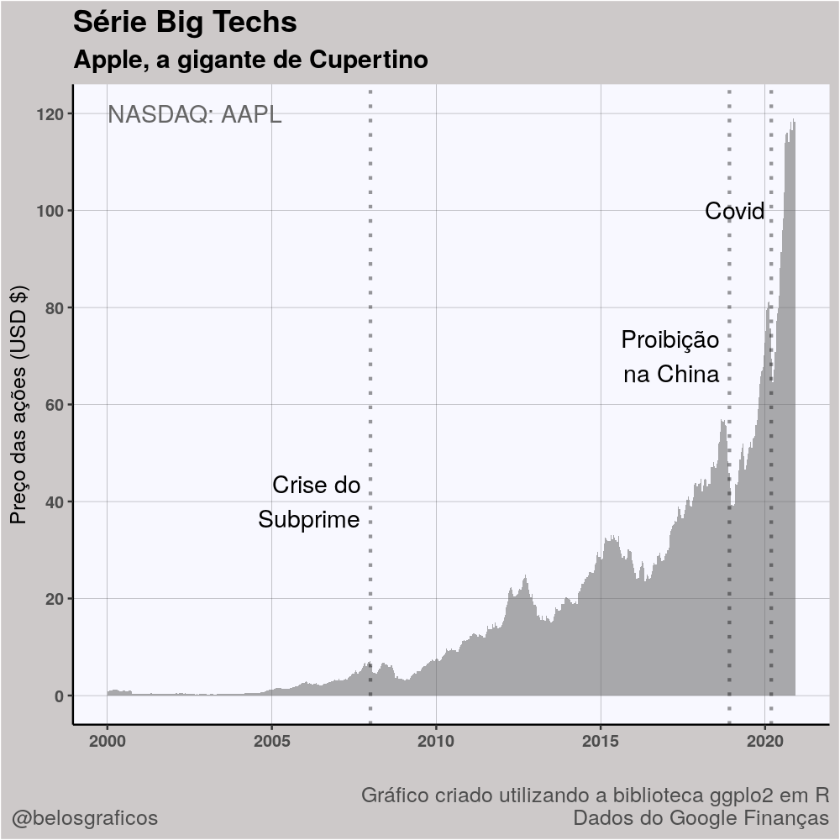

In [29]:
# Definindo um nome e tamanho para a figura a ser criada
fig_name = "big_techs_apple.png"
fig_width = 1000
fig_height = 1000

# Cria uma figura em branco com os parâmetros anteriores
png(fig_name, width = fig_width, height = fig_height)

# Criando o gráfico: e informando os dados que iremos utilizar
ggplot(dataset, aes(x = Date)) +

# Adicionando camadas com plots de área
geom_area(aes(y = Apple, alpha = 0.7), fill = 'gray40') +
#geom_area(aes(y = Google, alpha = 0.5), fill = 'firebrick1') +
#geom_area(aes(y = Facebook, alpha = 0.5), fill = 'dodgerblue2') +
#geom_area(aes(y = Microsoft, alpha = 0.5), fill = 'lawngreen') +
#geom_area(aes(y = Amazon, alpha = 0.5), fill = 'darkorange1') +

# Definindo o tema
theme_classic(base_size = 25) +
theme(legend.position = "", # Remove a legenda
        
      # Título dos eixos em negrito
      axis.text.x = element_text(face = "bold"), 
      axis.text.y = element_text(face = "bold"),
        
      # Título e subtitulo do gráfico centralizados e em negrito
      plot.title = element_text(hjust = 0, face = "bold", size = 36),
      plot.subtitle = element_text(hjust = 0, face = "bold", size = 30),
        
      # Cores de fundo da figura e da área do gráfico
      plot.background = element_rect(fill = "snow3"),
      panel.background = element_rect(fill = "ghostwhite"),
      panel.grid.major = element_line(size = 0.1, linetype = 'solid', colour = "black"),
                
      # Definição da nota de rodapé, utilizando vetores para configurar todas as notas
      plot.caption = element_text(color = 'gray30', hjust = c(-0.1,1), size = 25)) +

# Definições do eixo Y
scale_y_continuous(breaks = seq(0, 120, by = 20), 
                     limits = c(0,120)) +

# Linhas e textos auxiliares

geom_vline(xintercept = as.Date("2008-01-01"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2008-01-01"), y = 40,
         label = "Crise do\nSubprime",
         hjust = 1.1, size = 10, color = "black") +

geom_vline(xintercept = as.Date("2018-12-01"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2018-12-01"), y = 70,
         label = "Proibição\nna China",
         hjust = 1.1, size = 10, color = "black") +

geom_vline(xintercept = as.Date("2020-03-10"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2020-03-10"), y = 100,
         label = "Covid",
         hjust = 1.1, size = 10, color = "black") +

annotate("text",
         x = as.Date("2000-01-01"), y = 120,
         label = "NASDAQ: AAPL",
         hjust = 0, size = 10, color = "gray40") +

# Definição dos labels
labs(x = "", 
     y = "Preço das ações (USD $)", 
     title = "Série Big Techs",
     subtitle = "Apple, a gigante de Cupertino",
     caption = c("\n@belosgraficos","Gráfico criado utilizando a biblioteca ggplo2 em R\nDados do Google Finanças"))
  

# Salva a figura
dev.off()
img <- readPNG(fig_name)
grid::grid.raster(img)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”


png 
  2

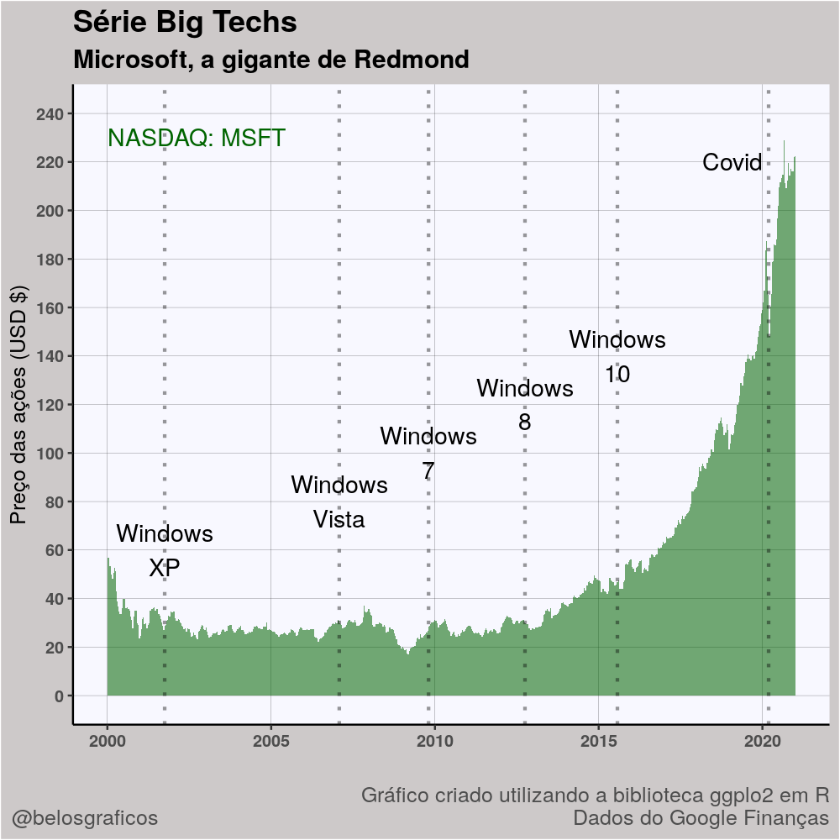

In [32]:
# Definindo um nome e tamanho para a figura a ser criada
fig_name = "big_techs_microsoft.png"
fig_width = 1000
fig_height = 1000

# Cria uma figura em branco com os parâmetros anteriores
png(fig_name, width = fig_width, height = fig_height)

# Criando o gráfico: e informando os dados que iremos utilizar
ggplot(dataset, aes(x = Date)) +

# Adicionando camadas com plots de área
#geom_area(aes(y = Google, alpha = 0.5), fill = 'firebrick1') +
#geom_area(aes(y = Facebook, alpha = 0.5), fill = 'dodgerblue2') +
geom_area(aes(y = Microsoft, alpha = 0.7), fill = 'darkgreen') +
#geom_area(aes(y = Amazon, alpha = 0.5), fill = 'darkorange1') +

# Definindo o tema
theme_classic(base_size = 25) +
theme(legend.position = "", # Remove a legenda
        
      # Título dos eixos em negrito
      axis.text.x = element_text(face = "bold"), 
      axis.text.y = element_text(face = "bold"),
        
      # Título e subtitulo do gráfico centralizados e em negrito
      plot.title = element_text(hjust = 0, face = "bold", size = 36),
      plot.subtitle = element_text(hjust = 0, face = "bold", size = 30),
        
      # Cores de fundo da figura e da área do gráfico
      plot.background = element_rect(fill = "snow3"),
      panel.background = element_rect(fill = "ghostwhite"),
      panel.grid.major = element_line(size = 0.1, linetype = 'solid', colour = "black"),
                
      # Definição da nota de rodapé, utilizando vetores para configurar todas as notas
      plot.caption = element_text(color = 'gray30', hjust = c(-0.1,1), size = 25)) +

# Definições do eixo Y
scale_y_continuous(breaks = seq(0, 240, by = 20), 
                     limits = c(0,240)) +

# Linhas e textos auxiliares
geom_vline(xintercept = as.Date("2001-10-01"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2001-10-01"), y = 60,
         label = "Windows\nXP",
         hjust = 0.5, size = 10, color = "black") +

geom_vline(xintercept = as.Date("2007-01-30"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2007-01-30"), y = 80,
         label = "Windows\nVista",
         hjust = 0.5, size = 10, color = "black") +

geom_vline(xintercept = as.Date("2009-10-22"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2009-10-22"), y = 100,
         label = "Windows\n7",
         hjust = 0.5, size = 10, color = "black") +

geom_vline(xintercept = as.Date("2012-10-01"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2012-10-01"), y = 120,
         label = "Windows\n8",
         hjust = 0.5, size = 10, color = "black") +

geom_vline(xintercept = as.Date("2015-07-29"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2015-07-29"), y = 140,
         label = "Windows\n10",
         hjust = 0.5, size = 10, color = "black") +

geom_vline(xintercept = as.Date("2020-03-10"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2020-03-10"), y = 220,
         label = "Covid",
         hjust = 1.1, size = 10, color = "black") +

annotate("text",
         x = as.Date("2000-01-01"), y = 230,
         label = "NASDAQ: MSFT",
         hjust = 0, size = 10, color = "darkgreen") +

# Definição dos labels
labs(x = "", 
     y = "Preço das ações (USD $)", 
     title = "Série Big Techs",
     subtitle = "Microsoft, a gigante de Redmond",
     caption = c("\n@belosgraficos","Gráfico criado utilizando a biblioteca ggplo2 em R\nDados do Google Finanças"))
  

# Salva a figura
dev.off()
img <- readPNG(fig_name)
grid::grid.raster(img)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Removed 1162 rows containing missing values (position_stack).”
Warning message:
“Removed 1 rows containing missing values (geom_text).”


png 
  2

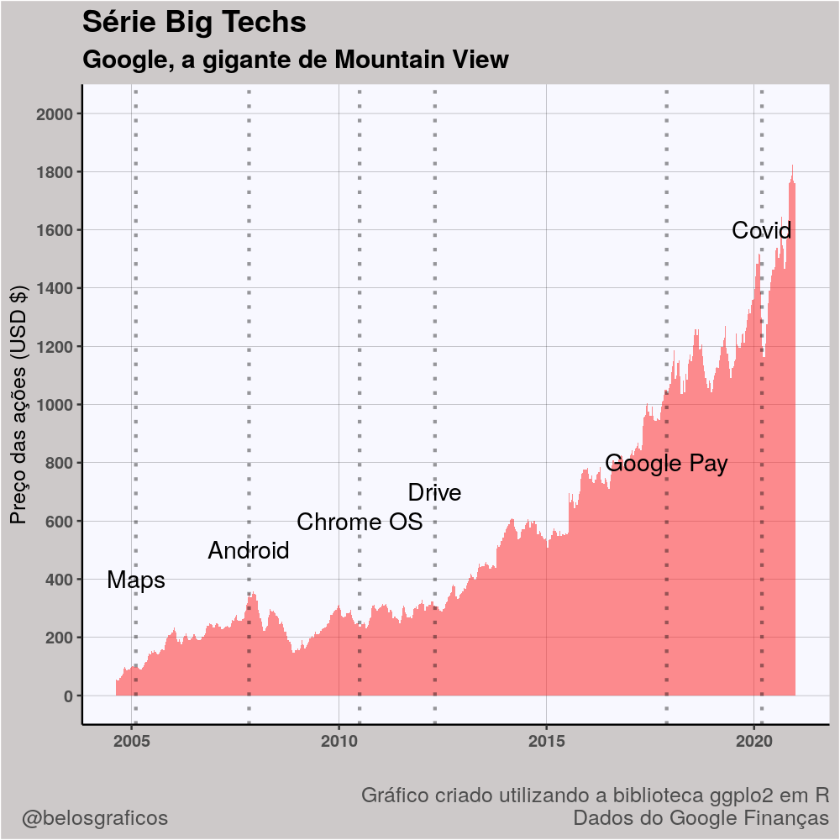

In [53]:
# Definindo um nome e tamanho para a figura a ser criada
fig_name = "big_techs_Google.png"
fig_width = 1000
fig_height = 1000

# Cria uma figura em branco com os parâmetros anteriores
png(fig_name, width = fig_width, height = fig_height)

# Criando o gráfico: e informando os dados que iremos utilizar
ggplot(dataset, aes(x = Date)) +

# Adicionando camadas com plots de área
geom_area(aes(y = Google, alpha = 0.7), fill = 'firebrick1') +
#geom_area(aes(y = Facebook, alpha = 0.5), fill = 'dodgerblue2') +
#geom_area(aes(y = Amazon, alpha = 0.5), fill = 'darkorange1') +

# Definindo o tema
theme_classic(base_size = 25) +
theme(legend.position = "", # Remove a legenda
        
      # Título dos eixos em negrito
      axis.text.x = element_text(face = "bold"), 
      axis.text.y = element_text(face = "bold"),
        
      # Título e subtitulo do gráfico centralizados e em negrito
      plot.title = element_text(hjust = 0, face = "bold", size = 36),
      plot.subtitle = element_text(hjust = 0, face = "bold", size = 30),
        
      # Cores de fundo da figura e da área do gráfico
      plot.background = element_rect(fill = "snow3"),
      panel.background = element_rect(fill = "ghostwhite"),
      panel.grid.major = element_line(size = 0.1, linetype = 'solid', colour = "black"),
                
      # Definição da nota de rodapé, utilizando vetores para configurar todas as notas
      plot.caption = element_text(color = 'gray30', hjust = c(-0.1,1), size = 25)) +

# Definições do eixo X
scale_x_date(limits = c(as.Date("2004-08-19"),as.Date("2020-12-31"))) +

# Definições do eixo Y
scale_y_continuous(breaks = seq(0, 2000, by = 200), 
                    limits = c(0,2000)) +

# Linhas e textos auxiliares
geom_vline(xintercept = as.Date("2005-02-08"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2005-02-08"), y = 400,
         label = "Maps",
         hjust = 0.5, size = 10, color = "black") +

geom_vline(xintercept = as.Date("2007-11-01"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2007-11-01"), y = 500,
         label = "Android",
         hjust = 0.5, size = 10, color = "black") +

geom_vline(xintercept = as.Date("2010-07-01"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2010-07-01"), y = 600,
         label = "Chrome OS",
         hjust = 0.5, size = 10, color = "black") +

geom_vline(xintercept = as.Date("2012-04-24"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2012-04-24"), y = 700,
         label = "Drive",
         hjust = 0.5, size = 10, color = "black") +

geom_vline(xintercept = as.Date("2017-11-23"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2017-11-23"), y = 800,
         label = "Google Pay",
         hjust = 0.5, size = 10, color = "black") +

geom_vline(xintercept = as.Date("2020-03-10"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2020-03-10"), y = 1600,
         label = "Covid",
         hjust = 0.5, size = 10, color = "black") +

annotate("text",
         x = as.Date("2000-01-01"), y = 1900,
         label = "NASDAQ: GOOGL",
         hjust = 0, size = 10, color = "firebrick1") +

# Definição dos labels
labs(x = "", 
     y = "Preço das ações (USD $)", 
     title = "Série Big Techs",
     subtitle = "Google, a gigante de Mountain View",
     caption = c("\n@belosgraficos","Gráfico criado utilizando a biblioteca ggplo2 em R\nDados do Google Finanças"))
  

# Salva a figura
dev.off()
img <- readPNG(fig_name)
grid::grid.raster(img)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Removed 1 rows containing missing values (position_stack).”


png 
  2

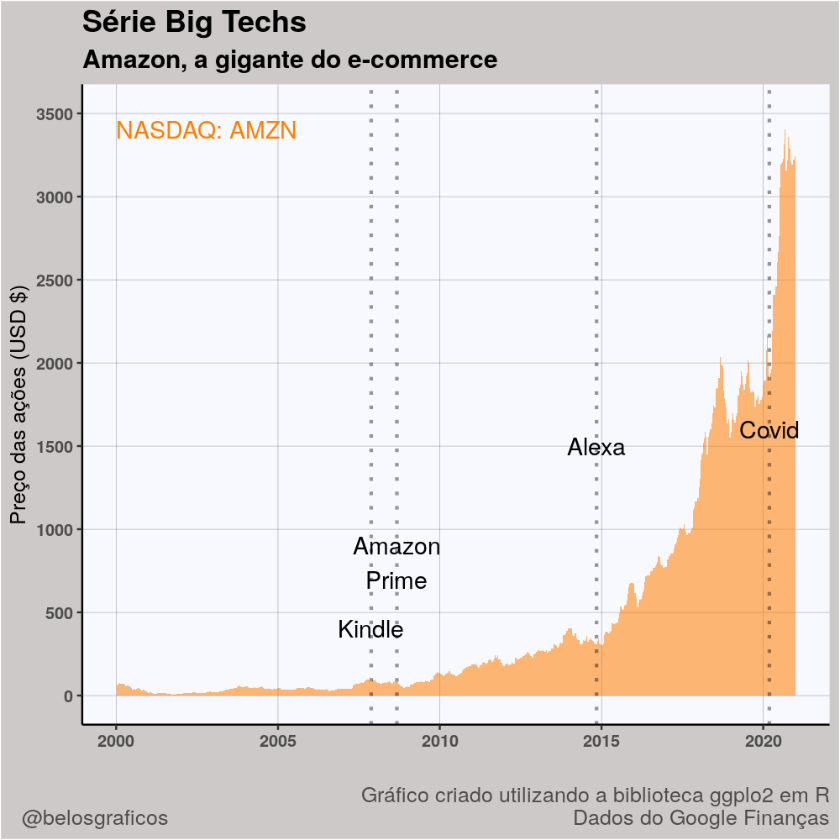

In [71]:
# Definindo um nome e tamanho para a figura a ser criada
fig_name = "big_techs_Amazon.png"
fig_width = 1000
fig_height = 1000

# Cria uma figura em branco com os parâmetros anteriores
png(fig_name, width = fig_width, height = fig_height)

# Criando o gráfico: e informando os dados que iremos utilizar
ggplot(dataset, aes(x = Date)) +

# Adicionando camadas com plots de área
#geom_area(aes(y = Facebook, alpha = 0.5), fill = 'dodgerblue2') +
geom_area(aes(y = Amazon, alpha = 0.7), fill = 'darkorange1') +

# Definindo o tema
theme_classic(base_size = 25) +
theme(legend.position = "", # Remove a legenda
        
      # Título dos eixos em negrito
      axis.text.x = element_text(face = "bold"), 
      axis.text.y = element_text(face = "bold"),
        
      # Título e subtitulo do gráfico centralizados e em negrito
      plot.title = element_text(hjust = 0, face = "bold", size = 36),
      plot.subtitle = element_text(hjust = 0, face = "bold", size = 30),
        
      # Cores de fundo da figura e da área do gráfico
      plot.background = element_rect(fill = "snow3"),
      panel.background = element_rect(fill = "ghostwhite"),
      panel.grid.major = element_line(size = 0.1, linetype = 'solid', colour = "black"),
                
      # Definição da nota de rodapé, utilizando vetores para configurar todas as notas
      plot.caption = element_text(color = 'gray30', hjust = c(-0.1,1), size = 25)) +

# Definições do eixo Y
scale_y_continuous(breaks = seq(0, 3500, by = 500), 
                    limits = c(0,3500)) +

# Linhas e textos auxiliares
geom_vline(xintercept = as.Date("2007-11-19"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2007-11-19"), y = 400,
         label = "Kindle",
         hjust = 0.5, size = 10, color = "black") +

geom_vline(xintercept = as.Date("2008-09-04"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2008-09-04"), y = 800,
         label = "Amazon\nPrime",
         hjust = 0.5, size = 10, color = "black") +

geom_vline(xintercept = as.Date("2014-11-06"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2014-11-06"), y = 1500,
         label = "Alexa",
         hjust = 0.5, size = 10, color = "black") +

geom_vline(xintercept = as.Date("2020-03-10"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2020-03-10"), y = 1600,
         label = "Covid",
         hjust = 0.5, size = 10, color = "black") +

annotate("text",
         x = as.Date("2000-01-01"), y = 3400,
         label = "NASDAQ: AMZN",
         hjust = 0, size = 10, color = "darkorange1") +

# Definição dos labels
labs(x = "", 
     y = "Preço das ações (USD $)", 
     title = "Série Big Techs",
     subtitle = "Amazon, a gigante do e-commerce",
     caption = c("\n@belosgraficos","Gráfico criado utilizando a biblioteca ggplo2 em R\nDados do Google Finanças"))
  

# Salva a figura
dev.off()
img <- readPNG(fig_name)
grid::grid.raster(img)

Warning message:
“Vectorized input to `element_text()` is not officially supported.
Results may be unexpected or may change in future versions of ggplot2.”
Warning message:
“Removed 3114 rows containing missing values (position_stack).”


png 
  2

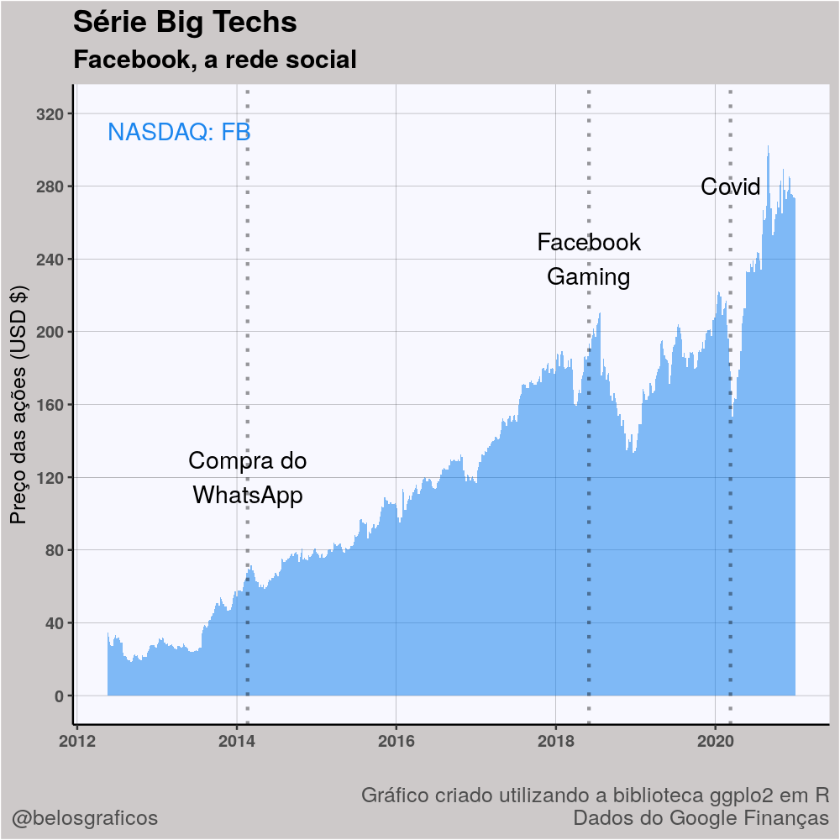

In [81]:
# Definindo um nome e tamanho para a figura a ser criada
fig_name = "big_techs_Face.png"
fig_width = 1000
fig_height = 1000

# Cria uma figura em branco com os parâmetros anteriores
png(fig_name, width = fig_width, height = fig_height)

# Criando o gráfico: e informando os dados que iremos utilizar
ggplot(dataset, aes(x = Date)) +

# Adicionando camadas com plots de área
geom_area(aes(y = Facebook, alpha = 0.7), fill = 'dodgerblue2') +


# Definindo o tema
theme_classic(base_size = 25) +
theme(legend.position = "", # Remove a legenda
        
      # Título dos eixos em negrito
      axis.text.x = element_text(face = "bold"), 
      axis.text.y = element_text(face = "bold"),
        
      # Título e subtitulo do gráfico centralizados e em negrito
      plot.title = element_text(hjust = 0, face = "bold", size = 36),
      plot.subtitle = element_text(hjust = 0, face = "bold", size = 30),
        
      # Cores de fundo da figura e da área do gráfico
      plot.background = element_rect(fill = "snow3"),
      panel.background = element_rect(fill = "ghostwhite"),
      panel.grid.major = element_line(size = 0.1, linetype = 'solid', colour = "black"),
                
      # Definição da nota de rodapé, utilizando vetores para configurar todas as notas
      plot.caption = element_text(color = 'gray30', hjust = c(-0.1,1), size = 25)) +

# Definições do eixo X
scale_x_date(limits = c(as.Date("2012-05-18"),as.Date("2020-12-31"))) +

# Definições do eixo Y
scale_y_continuous(breaks = seq(0, 320, by = 40), 
                    limits = c(0,320)) +

# Linhas e textos auxiliares
geom_vline(xintercept = as.Date("2014-02-19"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2014-02-19"), y = 120,
         label = "Compra do\nWhatsApp",
         hjust = 0.5, size = 10, color = "black") +

geom_vline(xintercept = as.Date("2018-06-01"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2018-06-01"), y = 240,
         label = "Facebook\nGaming",
         hjust = 0.5, size = 10, color = "black") +

geom_vline(xintercept = as.Date("2020-03-10"), 
           color = "black", 
           linetype = 3, size = 2,
           alpha = 0.4) +
annotate("text",
         x = as.Date("2020-03-10"), y = 280,
         label = "Covid",
         hjust = 0.5, size = 10, color = "black") +

annotate("text",
         x = as.Date("2012-05-18"), y = 310,
         label = "NASDAQ: FB",
         hjust = 0, size = 10, color = "dodgerblue2") +

# Definição dos labels
labs(x = "", 
     y = "Preço das ações (USD $)", 
     title = "Série Big Techs",
     subtitle = "Facebook, a rede social",
     caption = c("\n@belosgraficos","Gráfico criado utilizando a biblioteca ggplo2 em R\nDados do Google Finanças"))
  

# Salva a figura
dev.off()
img <- readPNG(fig_name)
grid::grid.raster(img)